In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

# 1-Know data and select feature

###  Let's discover the data

In [116]:
df=pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


####  At first, I thought that the ( name  ,  id  and Cabin ) would not secure the data in any way and ("Cabin") has alot Null value

In [118]:
df.drop(["Name","PassengerId","Cabin","Ticket"],axis=1,inplace=True)

In [119]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# 2-Deal with Null Values

## 2.1- Null values in "Embarked"

###  there are 3 null values in "Embarked" , we can fill it by mode

In [120]:
df.fillna({"Embarked":df["Embarked"].value_counts().index[0]},inplace=True)

## 2.2- Null values in "Age"

###  we must discoverd Correlating between "Age" and other columns

In [121]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### It is clear that there is a strong relationship between "ِAge" and "pclass"



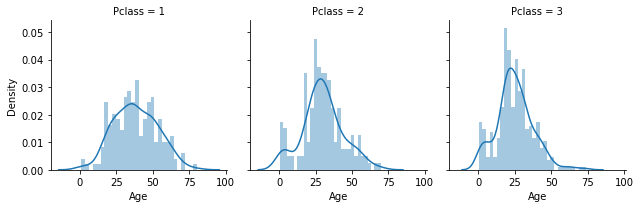

In [122]:
visualize = sns.FacetGrid(df, col='Pclass')
visualize.map(sns.distplot, 'Age', bins=30)

### i think , i can depend on "Pclass" to predict "Age"

In [123]:
pclass_1=df.loc[(df.Pclass==1 ) &(df["Age"].notna())]["Age"].median()
pclass_2=df.loc[(df.Pclass==2 ) &(df["Age"].notna())]["Age"].median()
pclass_3=df.loc[(df.Pclass==3 ) &(df["Age"].notna())]["Age"].median()
Age=[pclass_1,pclass_2,pclass_3]
for i in [1,2,3]:
    df.loc[ (df.Age.isnull()) & (df.Pclass == i),"Age"]=Age[i-1]

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### Now, i did't have any Null values

# 3- Let's analyze the data

([<matplotlib.patches.Wedge at 0x20b7d344850>,
 [Text(-0.5888624026491874, 1.541343917088664, '0'),
  Text(0.5888625469602174, -1.54134386195538, '1')],
 [Text(-0.32119767417228395, 0.8407330456847257, '61.6%'),
  Text(0.3211977528873913, -0.8407330156120254, '38.4%')])

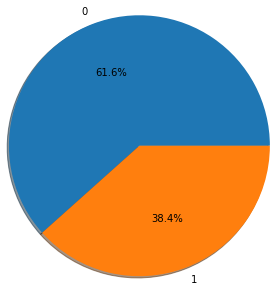

In [125]:
data=df["Survived"].value_counts().values
label=df["Survived"].value_counts().index
plt.pie(x=data,labels=label,shadow =True,autopct='%1.1f%%',radius=1.5 )

## Now I want to know what are the most influential feature

<AxesSubplot:>

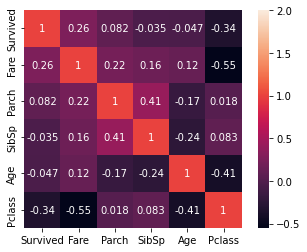

In [126]:
relashinships = df.corr()
cols = relashinships.nlargest(6, 'Survived')['Survived'].index
values = df[cols].corr()
sns.heatmap(values, cbar=True, annot=True, square=True,vmax=2 , yticklabels=cols.values, xticklabels=cols.values)

### ok , now we know that "Pclass" the most feature related with "Survived" then "Fare" then "Parch"

#### Now let's take a look at the Pclass

,total,Survived,percentage
Pclass,,,
1,216,136,62.962963
2,184,87,47.282609
3,491,119,24.236253


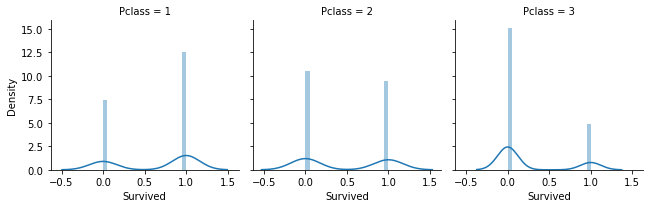

In [129]:
pclass_df=pd.DataFrame()
pclass_df["total"]=df.groupby("Pclass").count()["Survived"]
pclass_df["Survived"]=df.groupby("Pclass").sum()["Survived"]
pclass_df["percentage"]=(pclass_df["Survived"]/pclass_df["total"])*100

visualize = sns.FacetGrid(df, col='Pclass')
visualize.map(sns.distplot, 'Survived', bins=20)
pclass_df

#### It is clear that the survival rate in "Pclass=1" was higher than other  and in "Pclass=3" most of them died

### now let's see Parch and SibSp

In [130]:
gb=df.groupby("Parch").sum()["Survived"]

In [131]:
gb2=df.groupby("SibSp").sum()["Survived"]

####  It is clear that the less "Parch , SibSp", the higher the chance of survival

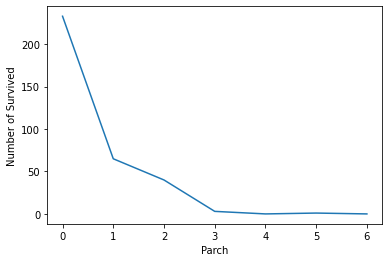

In [132]:

plt.plot(gb.index , gb.values)
plt.xlabel("Parch")
plt.ylabel("Number of Survived")
plt.show()

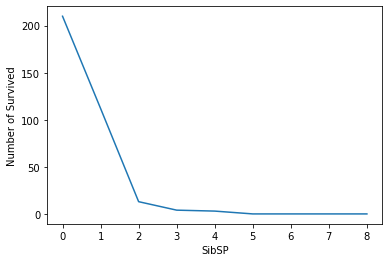

In [133]:
plt.plot(gb2.index , gb2.values)
plt.xlabel("SibSP")
plt.ylabel("Number of Survived")
plt.show()

### look at "Embarked"

In [134]:
df2=df.groupby("Embarked")
total=pd.DataFrame()
total["Total"]=df2.count()["Survived"]
total["Survived"]=df2.sum()["Survived"]
total["percentage"]=(total["Survived"]/total["Total"])*100
total

,Total,Survived,percentage
Embarked,,,
C,168,93,55.357143
Q,77,30,38.961039
S,646,219,33.900929


#### There is no clear difference between the percentage of survivors from the "َQ , S" Embarked" , but the highest percentage of survivors was from the "C".

<AxesSubplot:xlabel='Age', ylabel='Count'>

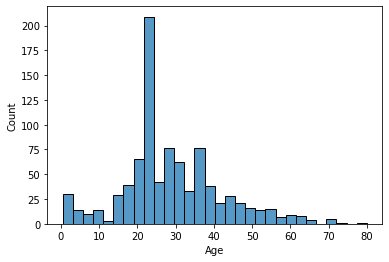

In [136]:
sns.histplot(data=df,x="Age",bins=30)

#  i think we should split "Age" to Categories 
 

In [137]:
df["Age"].value_counts().sort_values(ascending=False).head(50)

24.0    166
37.0     36
29.0     31
22.0     27
18.0     26
28.0     25
30.0     25
19.0     25
21.0     24
25.0     23
36.0     22
32.0     18
27.0     18
26.0     18
35.0     18
16.0     17
31.0     17
34.0     15
20.0     15
33.0     15
23.0     15
39.0     14
40.0     13
42.0     13
17.0     13
45.0     12
38.0     11
50.0     10
4.0      10
2.0      10
47.0      9
48.0      9
44.0      9
54.0      8
9.0       8
1.0       7
51.0      7
52.0      6
41.0      6
3.0       6
14.0      6
49.0      6
15.0      5
43.0      5
58.0      5
56.0      4
8.0       4
60.0      4
5.0       4
62.0      4
Name: Age, dtype: int64

In [138]:
def fun(x):
    if x<=4:
        return "Baby"
    elif 4<x<=17:
        return "Child"
    elif 17<x<=25:
        return "Teenager"
    elif 25<x<50:
        return "Adult"
    else :
        return "Old"
    
df["Age"]=df["Age"].apply(fun)

#  Classification

In [140]:
df=pd.get_dummies(df)

In [142]:
X=df.iloc[:,1:]
y=df["Survived"]

In [143]:
classification=LogisticRegression()
classification.fit(X,y)

LogisticRegression()

In [144]:
classification.score(X,y)

0.8125701459034792